# Tri par Fusion

[John von Neumann](https://fr.wikipedia.org/wiki/John_von_Neumann), 1945

## Principe

On peut facilement fusionner deux listes triées en une seule en en extrayant itérativement le plus petit élément. Celui-ci est forcément aussi le plus petit de l'une des deux listes à fusionner. 

Ce procédé est appelé fusion et est au cœur de l'algorithme de tri par fusion récursif.

* Si le tableau n'a qu'un élément, il est déjà trié.
* Sinon, séparer le tableau en deux parties à peu près égales.
* Trier récursivement les deux parties avec l'algorithme du tri fusion.
* Fusionner les deux parties triées en un seul tableau trié.

Ce tri a été illustré par [Saturday Morning Breakfast Cereal](http://www.smbc-comics.com/?id=1989)

## Fusion 

###  Entrées: 

les sous-tableaux `T[permier:limite]` et `T[limite:dernier]`, supposés triés.

### Sortie:

le tableau `T[premier:dernier]` est trié

### Algorithme:

* copier les deux sous-tableaux dans des tableaux annexes T1 et T2
* boucler par positions croissantes dans T et y copier
  * si T1 est vide, min(T2)
  * sinon, si T2 est vide, min(T1)
  * sinon, le plus petit de min(T1),min(T2)
  * et supprimer l'élément copié de la liste T1 ou T2

Les listes T1 et T2 étant triées, en obtenir le minimum consiste simplement à prendre l'élément de plus petit indice pas encore copié et le supprimer à incrémenter l'indice.

In [1]:
import include.helpers as asd1

In [2]:
def fusion(T, premier, limite, dernier):     
    asd1.affiche_entree_fusion(T,premier, limite, dernier)

    T1 = T[premier:limite].copy()
    T2 = T[limite:dernier].copy()
    i1 = i2 = 0
    
    for i in range(premier,dernier):
        if i2 < len(T2) and ( i1 >= len(T1) or T2[i2] < T1[i1]):
            T[i] = T2[i2]; i2 += 1
        else:
            T[i] = T1[i1]; i1 += 1

    asd1.affiche_sortie_fusion(T1,T2,T[premier:dernier])

In [3]:
T = [ 3, 4, 5, 1, 2, 6 ]
fusion( T, 0, 3, 6 )

[3, 4, 5, 1, 2, 6]  F(0,3,6) 
  [3, 4, 5] + [1, 2, 6] => [1, 2, 3, 4, 5, 6]


## Récursion

### Entrée: 

le tableau `T[premier:dernier]` dans un ordre quelconque

### Sortie: 

`T[premier:dernier]` est trié

### Cas trivial:

`T` a 0 ou 1 élément, ne rien faire

### Cas général: 

diviser `T` en deux, les trier récursivement, puis les fusionner



In [4]:
def recursion(T,premier,dernier):  
    asd1.affiche_entree_tri_fusion(T,premier, dernier)
    
    N = dernier - premier
    if N >= 2:
            
        milieu = premier + int(N/2)
        recursion(T,premier,milieu)
        recursion(T,milieu,dernier)
        fusion(T,premier,milieu,dernier)

In [ ]:
def tri(T):
    recursion(T,0,len(T))

In [5]:
T = [5, 4, 3, 2, 6, 7, 1]
tri(T)

[5, 4, 3, 2, 6, 7, 1]  R(0,7)
[5, 4, 3, 2, 6, 7, 1]    R(0,3)
[5, 4, 3, 2, 6, 7, 1]      R(0,1)
[5, 4, 3, 2, 6, 7, 1]    R(1,3)
[5, 4, 3, 2, 6, 7, 1]      R(1,2)
[5, 4, 3, 2, 6, 7, 1]      R(2,3)
[5, 4, 3, 2, 6, 7, 1]    F(1,2,3) 
  [4] + [3] => [3, 4]
[5, 3, 4, 2, 6, 7, 1]    F(0,1,3) 
  [5] + [3, 4] => [3, 4, 5]
[3, 4, 5, 2, 6, 7, 1]  R(3,7)
[3, 4, 5, 2, 6, 7, 1]    R(3,5)
[3, 4, 5, 2, 6, 7, 1]      R(3,4)
[3, 4, 5, 2, 6, 7, 1]      R(4,5)
[3, 4, 5, 2, 6, 7, 1]    F(3,4,5) 
  [2] + [6] => [2, 6]
[3, 4, 5, 2, 6, 7, 1]    R(5,7)
[3, 4, 5, 2, 6, 7, 1]      R(5,6)
[3, 4, 5, 2, 6, 7, 1]      R(6,7)
[3, 4, 5, 2, 6, 7, 1]    F(5,6,7) 
  [7] + [1] => [1, 7]
[3, 4, 5, 2, 6, 1, 7]  F(3,5,7) 
  [2, 6] + [1, 7] => [1, 2, 6, 7]
[3, 4, 5, 1, 2, 6, 7]  F(0,3,7) 
  [3, 4, 5] + [1, 2, 6, 7] => [1, 2, 3, 4, 5, 6, 7]


## En résumé

Le tri par fusion est mis en oeuvre de manière récursive. Il commence par faire deux appels récursifs sur les moitiés gauche et droite du tableau, puis les fusionne. 

L'opération de fusion n'étant appelée qu'une fois, il n'est pas  nécessaire de l'écrire dans une fonction séparée.

*Note: La fonction de comparaison est passée en paramètre générique pour permettre l'analyse de la stabilité, et les opérations de comparaison et d'assignation dans le tableau sont sous-traitées à include.helpers pour permettre de les compter lors de l'analyse de la complexité*

In [26]:
def tri_fusion_recursif(T,premier,dernier,comparer = asd1.plus_petit):
    
    if dernier - premier >= 2:    
        
        milieu = premier + int((dernier - premier)/2)
        
        tri_fusion_recursif(T, premier, milieu, comparer)
        tri_fusion_recursif(T, milieu, dernier, comparer)
        
        T1 = asd1.copier_tableau(T[premier:milieu]); i1 = 0
        T2 = asd1.copier_tableau(T[milieu:dernier]); i2 = 0
        
        for i in range(premier,dernier):
            if i2 < len(T2) and ( i1 >= len(T1) or comparer(T2[i2],T1[i1])):
                T[i] = asd1.assigner(T2[i2]); i2 += 1;
            else:
                T[i] = asd1.assigner(T1[i1]); i1 += 1;  

In [27]:
def tri_fusion(T, comparer = asd1.plus_petit ):
    tri_fusion_recursif(T,0,len(T),comparer)

## Stabilité

Le tri fusion est **stable**. 

La ligne critique est le test `T2[i2] < T1[i1]`. En cas d'égalité entre l'élément le plus petit de T1 ou de T2, il faut d'abord copier dans T celui de T1, puisque celui-ci vient de la section `[premier:milieu]` qui est antérieure à la section `[milieu:dernier]`

Vérifions le en triant par parties fractionnaires puis par parties entières. 


Le tri est stable


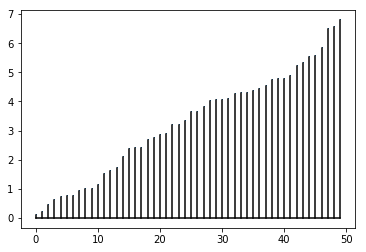

In [11]:
asd1.test_stabilite(tri_fusion)

## Complexité

Evaluons d'abord la complexité du tri d'un tableau au contenu généré aléatoirement. 

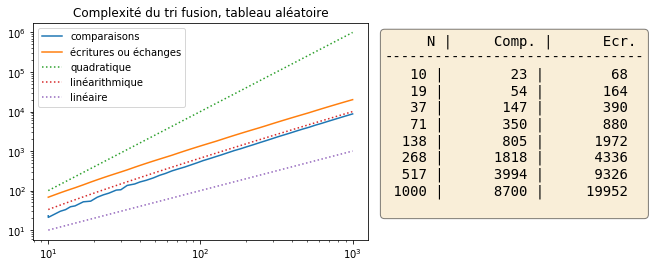

In [25]:
asd1.evalue_complexite(tri_fusion, asd1.tableau_aleatoire, 
                       "tri fusion, tableau aléatoire")

La complexité du tri est linéarithmique en $\Theta(n\log(n))$. C'est assez simple à démontrer si l'on considère l'algorithme par niveau de récursion. 

* Notons tout d'abord que chaque appel récursif divise par deux la taille du tableau à traiter. La profondeur totale de la récursion est donc proportionnelle à $\log_2(n)$.
* Considérons maintenant une profondeur de récursion donnée.
   * au premier niveau, la fusion est effectuée une seule fois sur l'ensemble des $n$ éléments
   * au second niveau, deux fusions sont effectuées, mais à chaque fois sur la moitié des éléments seulement, pour un total de $2 \frac{n}{2} = n$ éléments fusionnés
   * au $k^{ieme}$ niveau, environ $2^{k-1}$ fusions sont effectuées, chacune sur environ $\frac{n}{2^{k-1}}$ éléments pour un total de n éléments fusionnés. 
   * à chaque niveau de récursion, la fusion requiert donc en tout de déplacer $n$ éléments
* Il y a donc en tout $n\log(n)$ éléments testés et déplacés par les opérations de fusion

### Réduire le nombre d'écriture

S'il est efficace pour le nombre de comparaisons, ce tri effectue un très grand nombre d'écritures dans le tableau. A chaque fusion, chaque élément est en effet copié 2 fois.

* du tableau T vers un des tableaux annexes T1 ou T2
* d'un tableau annexe vers T

Il est possible d'éviter la première de ces copies en utilisant toujours le même tableau annexe de la taille du tableau T original, et en échangeant le rôle des deux tableaux à chaque niveau de récursion

In [28]:
def tri_fusion_recursif2(OUT,IN,premier,dernier,comparer = asd1.plus_petit): 
    if dernier - premier >= 2:          
        milieu = premier + int((dernier - premier)/2)
        tri_fusion_recursif2(IN,OUT, premier, milieu, comparer)
        tri_fusion_recursif2(IN,OUT, milieu, dernier, comparer)
        # Noter que l'on inverse les rôles de IN et OUT dans ces appels

        i1 = premier; i2 = milieu
        for i in range(premier,dernier):
            if i2 < dernier and ( 
                i1 >= milieu or comparer(IN[i2],IN[i1]) ):
                OUT[i] = asd1.assigner(IN[i2]); i2 += 1;
            else:
                OUT[i] = asd1.assigner(IN[i1]); i1 += 1;
                
def tri_fusion2(T, comparer = asd1.plus_petit ):
    TMP = asd1.copier_tableau(T)
    tri_fusion_recursif2(T,TMP,0,len(T),comparer)

Toutes les copies T → T1 et T → T2 sont remplacées par une seule copie de T → TMP. On passe donc d'environ $2 \cdot n \cdot \log n$ écritures à seulement $n \cdot \log n + n$.

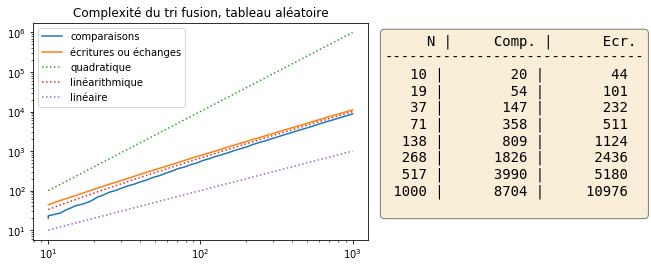

In [29]:
asd1.evalue_complexite(tri_fusion2, asd1.tableau_aleatoire, 
                       "tri fusion, tableau aléatoire")

## Complexité spatiale

Les deux versions de l'algorithme présentées demandent de copier tous les éléments dans un tableau annexe. La mémoire additionelle utilisée est donc $\Theta(n)$. 


Si ce n'est pas acceptable, il existe des alternatives

* [Dudzinki][1] (1981) propose propose une fonction de fusion en place RECMERGE de complexité temporelle $\Theta(n \log n)$, ce qui donne une complexité $\Theta(n \log^2 n)$ pour le tri fusion. Elle est utilisée par `std::stable_sort` en C++ quand la mémoire est limitée. 


* [Katajainen][2] (1996) propose un tri fusion entièrement en place (complexité spatiale $\Theta(1)$) mais pas stable


* [Geffert][3] (2000) montre qu'un tri fusion en place stable est possible avec une complexité temporelle en $\Theta(n \log n)$ et spatiale en $\Theta(1)$, mais il est trop lent en pratique


* [Kim et Kutzner][4] (2008) proposent une variante de [tri par bloc][5] qui est stable, a une complexité temporelle $\Theta(n \log n)$ et spatiale presque constante $\Theta(\log^2 n)$

[1]: https://doi.org/10.1016/0020-0190(81)90065-X
[2]: http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.22.8523
[3]: https://doi.org/10.1016/S0304-3975(98)00162-5
[4]: http://itbe.hanyang.ac.kr/ak/papers/tamc2008.pdf
[5]: https://en.wikipedia.org/wiki/Block_sort

## Visualisation

Trions un tableau de 64 entiers aléatoires entre 0 et 100. Nous affichons l'état du tableau aprés les étapes de fusion qui fusionnent 16 éléments ou plus. 

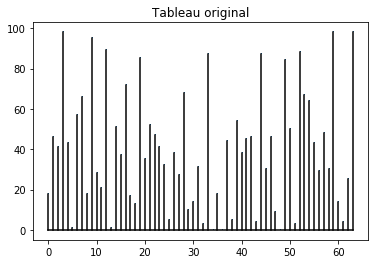

In [12]:
import numpy as np
T = np.random.randint(0,100,64)
asd1.afficheIteration(T,'Tableau original')  

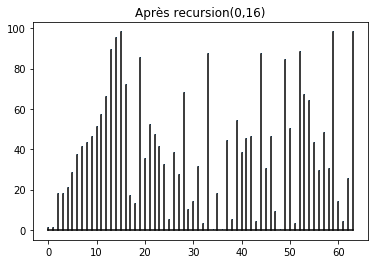

In [13]:
tri_fusion_recursif(T,0,16)
asd1.afficheIteration(T,'Après recursion(0,16)')  

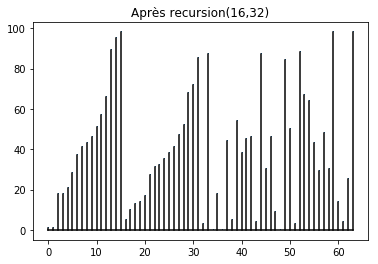

In [14]:
tri_fusion_recursif(T,16,32)
asd1.afficheIteration(T,'Après recursion(16,32)') 

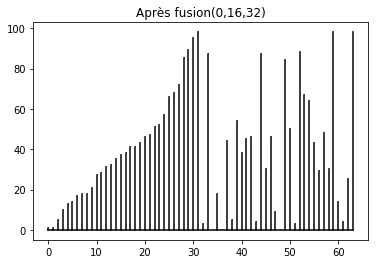

In [15]:
fusionner(T,0,16,32)
asd1.afficheIteration(T,'Après fusion(0,16,32)') 

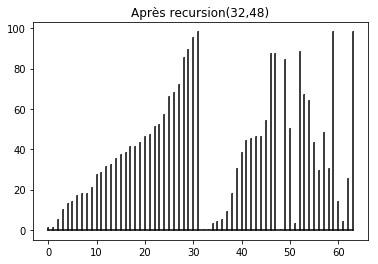

In [16]:
tri_fusion_recursif(T,32,48)
asd1.afficheIteration(T,'Après recursion(32,48)')  

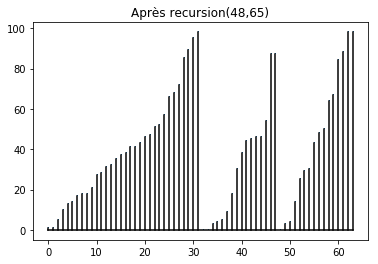

In [17]:
tri_fusion_recursif(T,48,64)
asd1.afficheIteration(T,'Après recursion(48,65)')  

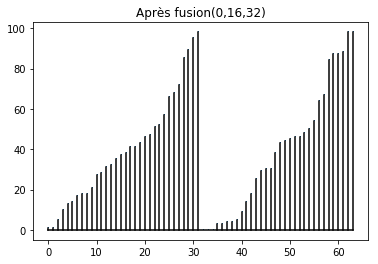

In [18]:
fusionner(T,32,48,64)
asd1.afficheIteration(T,'Après fusion(0,16,32)')

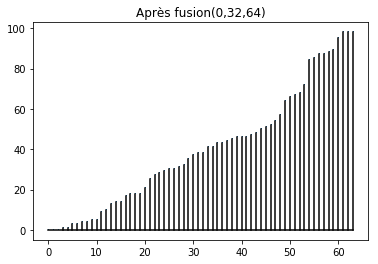

In [19]:
fusionner(T,0,32,64)
asd1.afficheIteration(T,'Après fusion(0,32,64)')

[ASD1 Notebooks on GitHub.io](https://ocuisenaire.github.io/ASD1-notebooks/)

© Olivier Cuisenaire, 2018